# 12주차(목) 실습문제 - 다중회귀모델 (Ch.5.3)

제출시 HTML(.html) 형식으로 다운로드한 뒤, 올려주세요.

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 선형모델을 추정하는 라이브러리 (경고가 나올 수 있음)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 표시 자릿수 지정
%precision %.3f
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

data = pd.read_csv("health2018.csv")

---

## 1. 혈당값 예측에 대한 다중회귀모델
### 1-1. seaborn의 pairplot() 함수를 이용해서 데이터 내 변량의 분포를 그리시오.
남녀를 각각 다른 색깔로 표시할 것.

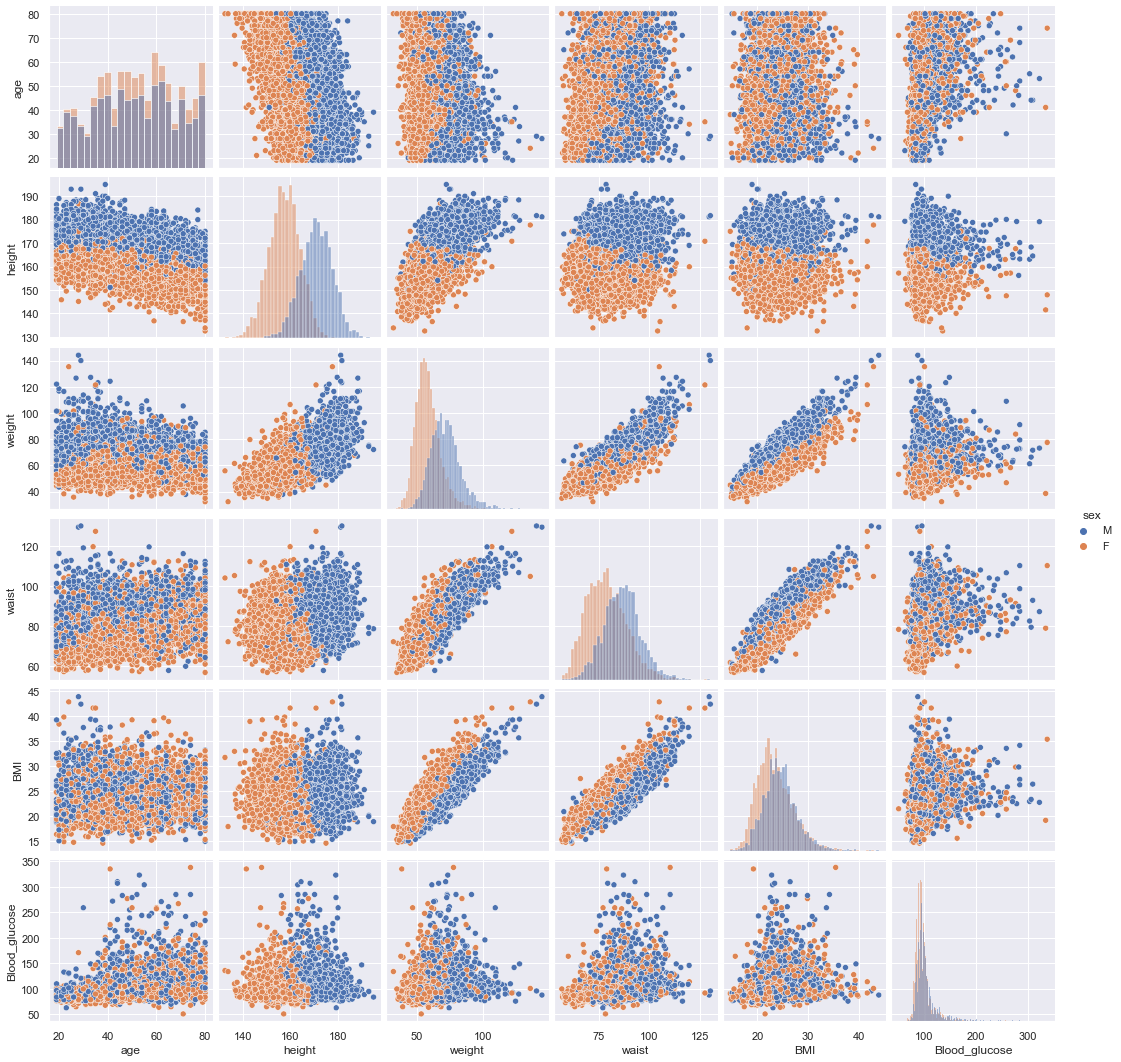

In [2]:
sns.pairplot(data = data, hue = "sex", diag_kind = 'hist')

### 1-2. 혈당값을 예측하는 다중회귀모델을 만드시오 (독립변수로 age, height, weight, waist, BMI, sex를 포함시킬 것). t검정을 기준으로 유의미한 독립변수는 무엇인가?

In [3]:
lm_data = smf.ols( "Blood_glucose ~ age + height + weight + waist + BMI + sex",  data = data).fit()
lm_data.summary().tables[1]
# sex[T.M], age, waist가 유의미한 독립변수
# P>|t|가 0.05이하인 값들

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,16.6678,31.380,0.531,0.595,-44.848,78.184
sex[T.M],2.8906,0.876,3.300,0.001,1.173,4.608
age,0.2374,0.023,10.153,0.000,0.192,0.283
height,0.1459,0.191,0.763,0.445,-0.229,0.521
weight,-0.3238,0.233,-1.392,0.164,-0.780,0.132
waist,0.7397,0.073,10.089,0.000,0.596,0.883
BMI,0.3023,0.652,0.463,0.643,-0.977,1.581


### 1-3. Type-II ANOVA를 이용해서 각각의 요인(독립변수)이 설명하는 수정제곱합을 구하시오. 가장 많은 제곱합을 설명하는 요인이 무엇인지 그 순서를 이야기하시오.

In [4]:
mod_full = smf.ols("Blood_glucose ~ age + height + weight + waist + BMI + sex",data).fit()
print(sm.stats.anova_lm(mod_full, typ=2).round(3))
# age, waist, sex, weight, height, BMI순

               sum_sq      df        F  PR(>F)
sex          4939.468     1.0   10.887   0.001
age         46771.401     1.0  103.089   0.000
height        264.443     1.0    0.583   0.445
weight        878.689     1.0    1.937   0.164
waist       46176.838     1.0  101.778   0.000
BMI            97.413     1.0    0.215   0.643
Residual  2704503.633  5961.0      NaN     NaN


### 1-4. 위의 순서를 따라 독립변수가 0개인 모델(null model)부터 6개인 모델까지 만들고, 각각의 결정계수와 AIC를 구하여 비교하시오. 결정계수가 눈에 띄게 증가하는 건 몇번째 모델까지인가? AIC가 가장 작은 모델은 무엇인가?

In [5]:
null_model = smf.ols("Blood_glucose ~ 1", data).fit()
print(null_model.rsquared,null_model.aic)

-2.220446049250313e-16 54321.0248279541


In [6]:
model1 = smf.ols("Blood_glucose ~ age", data).fit()
print(model1.rsquared,model1.aic)

0.07026853671573507 53888.19942930646


In [7]:
model2 = smf.ols("Blood_glucose ~ age + waist", data).fit()
print(model2.rsquared,model2.aic)

0.13307465837656662 53472.78000287824


In [8]:
model3 = smf.ols("Blood_glucose ~ age + waist + sex", data).fit()
print(model3.rsquared,model3.aic)

0.13543429997434775 53458.51384910141


In [9]:
model4 = smf.ols("Blood_glucose ~ age + waist + sex + weight", data).fit()
print(model4.rsquared,model4.aic)

0.13702404225631049 53449.52993496631


In [10]:
model5 = smf.ols("Blood_glucose ~ age + waist + sex + weight + height", data).fit()
print(model5.rsquared,model5.aic)

0.13717067715137488 53450.51577993306


In [11]:
model6 = smf.ols("Blood_glucose ~ age + waist + sex + weight + height + BMI", data).fit()
print(model6.rsquared,model6.aic)

0.13720175404844692 53452.30082402358


In [12]:
# 결정계수는 model2(세번째)까지 눈에 띄게 증가한다 AIC가 가장 작은 모델은 model4

## 2. 다중회귀모델을 이용한 혈당값 예측
### 2-1. data의 처음 100개 샘플에 대해 예측값 vs. 관측값의 그래프를 그리시오. (독립변수 age, waist, sex를 포함한 모델을 사용할 것)
x축에는 예측값, y축에는 실제 혈당값(Blood_glucose)가 놓이도록 그래프를 그릴 것. (가능하면 sns.regplot이나 sns.lmplot을 이용해 추세선을 넣고 비교하라)

In [13]:
data['Glucose_predicted'] = model3.predict()
data2 = data[:100]
data2

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,Glucose_predicted
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,110.747624
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,118.739835
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,106.077751
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,96.445919
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,114.040007
...,...,...,...,...,...,...,...,...,...
95,A904021502,F,39,177.9,74.7,80.4,23.603081,93,95.680623
96,A904022001,M,50,164.6,69.6,86.0,25.689141,91,104.236886
97,A904022002,F,44,161.0,55.8,71.4,21.526947,94,92.316879
98,A904022402,M,36,163.9,74.7,88.6,27.807548,107,101.638110


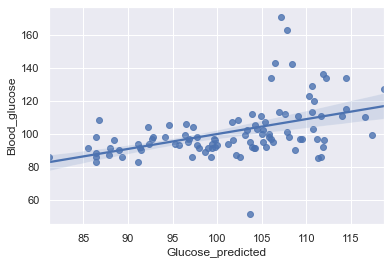

In [14]:
sns.regplot(x = 'Glucose_predicted', y = 'Blood_glucose', data = data2)

### 2-2. data 각 행에 대해 모델이 예측한 혈당값(Glucose_predicted)을 구하고, 연령별로 혈당값 예측의 그래프를 그리시오. 또한 실제 혈당값에 대해 같은 그래프를 그려보고 비교하시오.
x축은 연령(예: 19~80세), y축은 예측된 혈당값. (힌트: sns.boxplot 등 사용)

In [15]:
data['Glucose_predicted']

0       110.747624
1       118.739835
2       106.077751
3        96.445919
4       114.040007
           ...    
5963     89.066219
5964    107.027814
5965    103.647916
5966    109.265169
5967     96.106012
Name: Glucose_predicted, Length: 5968, dtype: float64

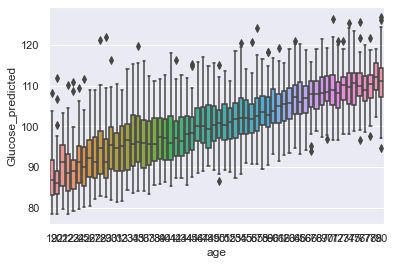

In [16]:
sns.boxplot(x = 'age', y = 'Glucose_predicted', data = data)

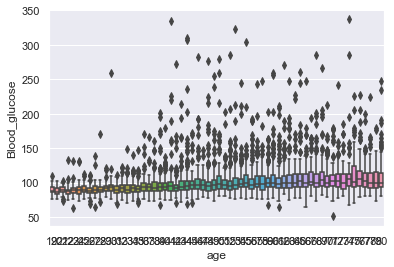

In [17]:
sns.boxplot (x = 'age', y = 'Blood_glucose', data = data)

### 2-3. 공복혈당량을 100 mg/dL 이하로 낮추고 싶다고 가정하자. 나이와 성별을 입력하면, 위의 모델을 따라 허리둘레(waist)가 얼마 이하여야 예상 공복혈당량이 100이 되는지 알려주는 코드를 작성하시오.
나이: 40세, 성별: 남성 기준으로 테스트

In [ ]:
a = float(input("age : "))
b = input("sex : ")

In [ ]:
if b == "M":
    b = 1
else:
    b= 0

In [ ]:
beta0 = model3.params[0]
beta1 = model3.params[1]
beta2 = model3.params[2]
beta3 = model3.params[3]

waist = (100 - beta0 - beta1 * b - beta2 * a) / beta3
print(waist)